# Projeto Final - Ciência dos dados
### Alunos:
- Beatriz Lourenço 
- Fernando Kenji 
- Sophia Kerber
- Pedro H. Menezes

### Pergunta Motivadora:
É possível prever a avaliação de um livro (no ranking do Goodreads) com as seguintes variáveis?
- Inicial do autor
- Número de páginas
- Gênero
- Formato do livro (Capa dura, capa em papel, versão Kindle...)


In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [129]:
# Base de dados original
csv = pd.read_csv('book_data.csv')
csv.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [130]:
# Retirando os livros com informações faltando
csv1=csv.dropna()
csv1.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,100821,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...
6,C.S. Lewis|Pauline Baynes,"Journeys to the end of the world, fantastic cr...",Reissue Edition,Paperback,9.78007E+12,767 pages,4.25,437829,9439,The Chronicles of Narnia,Fantasy|Classics|Fiction|Young Adult|Childrens,https://images.gr-assets.com/books/1449868701l...


In [131]:
ar = csv1['genres'].tolist()
ar1 = []
iniciais = []
paginas = []

print(ar[0:10])
# Escolhendo como gênero literário apenas o primeiro listado.
for i in ar:
    if i == "":
        ar1.append('')
    else:
        a = i.split('|')
        ar1.append(a[0])
        
# Selecionando apenas a inicial dos nomes dos autores
for i in csv1['book_authors']:
    iniciais.append(i[0])

# Apenas o número de páginas aparecerá, sem a palavra "pages"
for i in csv1['book_pages']:
    numero = i.split(' ')
    paginas.append(int(numero[0]))
print(paginas[0:10])
print(iniciais[0:10])
print(ar1[0:10])

['Fantasy|Young Adult|Fiction', 'Classics|Fiction|Historical|Historical Fiction|Academic|School', 'Classics|Fiction|Romance', 'Historical|Historical Fiction|Fiction|Young Adult', 'Fantasy|Classics|Fiction|Young Adult|Childrens', 'Fantasy|Fiction|Classics', 'Classics|Fiction|Romance|Literature', 'Fiction|Historical|Historical Fiction|Romance|Historical', 'Fiction|Classics|Horror|Fantasy|Literature|Gothic|Novels|Literature|19th Century|Classics|Classic Literature|European Literature|British Literature', 'Classics|Fiction|Romance|Historical|Historical Fiction|Literature|Gothic|Historical|Literature|19th Century|Classics|Classic Literature|Academic|School']
[870, 324, 279, 552, 767, 1728, 464, 434, 367, 507]
['J', 'H', 'J', 'M', 'C', 'J', 'E', 'A', 'O', 'C']
['Fantasy', 'Classics', 'Classics', 'Historical', 'Fantasy', 'Fantasy', 'Classics', 'Fiction', 'Fiction', 'Classics']


In [132]:
# Criando colunas no DataFrame para as iniciais dos autores, os números de páginas e o principal gênero do livro
ar1= pd.DataFrame({'genero':ar1},index=csv1.index)
iniciais_ = pd.DataFrame({'iniciais':iniciais}, index = csv1.index)
paginas_ = pd.DataFrame({'paginas':paginas}, index = csv1.index)

In [133]:
csv1 = csv1.join(ar1,how='left')
csv1 = csv1.join(iniciais_,how='inner')
csv1 = csv1.join(paginas_,how='inner')


In [134]:
csv1.head(10)

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,genero,iniciais,paginas
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,Fantasy,J,870
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,Classics,H,324
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,Classics,J,279
5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,100821,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...,Historical,M,552
6,C.S. Lewis|Pauline Baynes,"Journeys to the end of the world, fantastic cr...",Reissue Edition,Paperback,9.78007E+12,767 pages,4.25,437829,9439,The Chronicles of Narnia,Fantasy|Classics|Fiction|Young Adult|Childrens,https://images.gr-assets.com/books/1449868701l...,Fantasy,C,767
9,J.R.R. Tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,Mass Market Paperback,9.78035E+12,1728 pages,4.59,99793,1652,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...,Fantasy,J,1728
13,Emily Brontë|Richard J. Dunn|David Timson|Char...,You can find the redesigned cover of this edit...,Fourth Edition,Paperback,9.78039E+12,464 pages,3.84,1121100,29400,Wuthering Heights,Classics|Fiction|Romance|Literature,https://images.gr-assets.com/books/1388212715l...,Classics,E,464
15,Arthur Golden,"A literary sensation and runaway bestseller, t...",Large Print,Hardcover,9.78074E+12,434 pages,4.09,1525851,27168,Memoirs of a Geisha,Fiction|Historical|Historical Fiction|Romance|...,https://images.gr-assets.com/books/1388367666l...,Fiction,A,434
17,Oscar Wilde|Jeffrey Eugenides,"﻿Written in his distinctively dazzling manner,...",Modern Library Classics,Paperback,9.78038E+12,367 pages,4.06,775701,22938,The Picture of Dorian Gray,Fiction|Classics|Horror|Fantasy|Literature|Got...,https://images.gr-assets.com/books/1424596966l...,Fiction,O,367
20,Charlotte Brontë|Michael Mason,"Fiery love, shocking twists of fate, and tragi...",Penguin Classics,Paperback,9.78014E+12,507 pages,4.11,1381404,34670,Jane Eyre,Classics|Fiction|Romance|Historical|Historical...,https://images.gr-assets.com/books/1327867269l...,Classics,C,507


In [135]:
# Retirando as colunas irrelevantes para a análise geral de avaliações
csv1.drop(['book_isbn','book_authors','book_desc','book_edition','book_rating_count','book_review_count','genres','image_url','book_pages'],axis=1,inplace=True)

In [136]:
csv1.head()

,book_format,book_rating,book_title,genero,iniciais,paginas
1,Paperback,4.48,Harry Potter and the Order of the Phoenix,Fantasy,J,870
2,Paperback,4.27,To Kill a Mockingbird,Classics,H,324
3,Paperback,4.25,Pride and Prejudice,Classics,J,279
5,Hardcover,4.36,The Book Thief,Historical,M,552
6,Paperback,4.25,The Chronicles of Narnia,Fantasy,C,767


In [138]:
# Separando as variáveis em quantitativas, qualitativas e a desejada
y = csv1['book_rating'].values
num = csv1[['paginas']]
qual = csv1[['book_format','genero','iniciais']]

In [139]:
qual.head()

,book_format,genero,iniciais
1,Paperback,Fantasy,J
2,Paperback,Classics,H
3,Paperback,Classics,J
5,Hardcover,Historical,M
6,Paperback,Fantasy,C


In [140]:
encoder = OneHotEncoder()
capa_encoded = encoder.fit_transform(qual)

In [141]:
x_num = num.values

In [142]:
x_encoded = capa_encoded.toarray()

In [143]:
X = np.concatenate((x_num,x_encoded), axis=1)

In [144]:
X[0]

array([870.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [145]:
y[0]

4.48

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing,utils, metrics
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i]>5:
        y_pred[i]=5
    elif y_pred[i]<0:
        y_pred[i]=0
        
df = pd.DataFrame({'Atual': y_test.flatten(), 'Predito': y_pred.flatten()})
df.head()

,Atual,Predito
0,3.64,3.902044
1,3.75,3.811071
2,4.10,4.205652
3,4.34,4.048923
4,4.14,4.015772


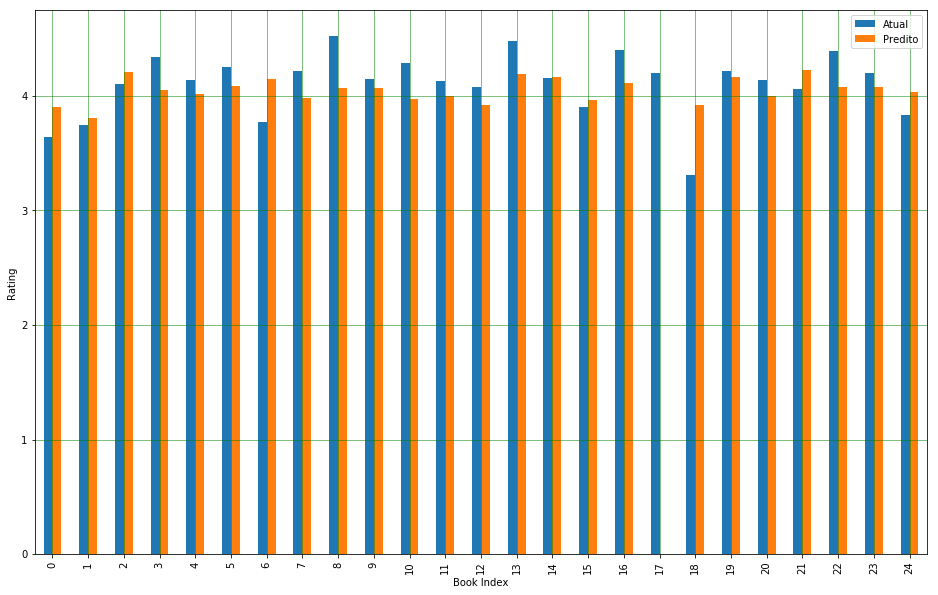

In [155]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Book Index')
plt.ylabel('Rating')
plt.show()

In [156]:
print("O R² é " + str(metrics.r2_score(df['Atual'],df['Predito'])))

O R² é -1.9339043919555348
